In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

sns.set_style('darkgrid')
sns.set_context('notebook')

In [2]:
df = pd.read_csv("./data2/ana2_BTS_geoOnly_210216_morning_CDT.csv",index_col='index')
df

,date,hour,language,retweets,min,place,country,replies,likes,quotes,sec,time,tweet
index,,,,,,,,,,,,,
1,2021-02-16,6,ko,0,40,"[Santa Clara, CA]",USA,0,0,0,43,2021-02-16T06:40:43.000-06:00,나의그림😙❣️#BTS @BTSfanart #ARMY https://t.co/d6vu...
2,2021-02-16,7,en,0,3,"[Quezon City, National Capital Region]",Philippines,0,0,0,10,2021-02-16T07:03:10.000-06:00,NowON\n#OT7 #BTS https://t.co/YzsSBnIoj1
3,2021-02-16,7,en,0,14,[Jamaica],Jamaica,0,0,0,58,2021-02-16T07:14:58.000-06:00,All now so we gone to collect the leftovers on...
4,2021-02-16,7,ru,1,28,"[Province of Novosibirsk, Russia]",Russia,0,0,0,13,2021-02-16T07:28:13.000-06:00,Боже... Спасите меня кто-нибудь... Пожалуйста....
5,2021-02-16,7,en,0,35,"[Penza, Russia]",Russia,0,0,0,6,2021-02-16T07:35:06.000-06:00,You create a great mood! The best and most ama...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 5
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      5 non-null      object
 1   hour      5 non-null      int64 
 2   language  5 non-null      object
 3   retweets  5 non-null      int64 
 4   min       5 non-null      int64 
 5   place     5 non-null      object
 6   country   5 non-null      object
 7   replies   5 non-null      int64 
 8   likes     5 non-null      int64 
 9   quotes    5 non-null      int64 
 10  sec       5 non-null      int64 
 11  time      5 non-null      object
 12  tweet     5 non-null      object
dtypes: int64(7), object(6)
memory usage: 560.0+ bytes


In [4]:
df.describe()

,hour,retweets,min,replies,likes,quotes,sec
count,5.000000,5.000000,5.000000,5.0,5.0,5.0,5.000000
mean,6.800000,0.200000,24.000000,0.0,0.0,0.0,26.000000
std,0.447214,0.447214,15.280707,0.0,0.0,0.0,23.119256
min,6.000000,0.000000,3.000000,0.0,0.0,0.0,6.000000
25%,7.000000,0.000000,14.000000,0.0,0.0,0.0,10.000000
50%,7.000000,0.000000,28.000000,0.0,0.0,0.0,13.000000
75%,7.000000,0.000000,35.000000,0.0,0.0,0.0,43.000000
max,7.000000,1.000000,40.000000,0.0,0.0,0.0,58.000000


In [5]:
df['place'].isnull().value_counts(normalize=True)

False    1.0
Name: place, dtype: float64

In [6]:
df['country'].isnull().value_counts(normalize=True)

False    1.0
Name: country, dtype: float64

In [7]:
df.dropna(axis=0, how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 5
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      5 non-null      object
 1   hour      5 non-null      int64 
 2   language  5 non-null      object
 3   retweets  5 non-null      int64 
 4   min       5 non-null      int64 
 5   place     5 non-null      object
 6   country   5 non-null      object
 7   replies   5 non-null      int64 
 8   likes     5 non-null      int64 
 9   quotes    5 non-null      int64 
 10  sec       5 non-null      int64 
 11  time      5 non-null      object
 12  tweet     5 non-null      object
dtypes: int64(7), object(6)
memory usage: 560.0+ bytes


In [8]:
df['place'] = df.place.apply(lambda x: x[1:-1].split(','))
df.place.head()

index
1                         [Santa Clara,  CA]
2    [Quezon City,  National Capital Region]
3                                  [Jamaica]
4         [Province of Novosibirsk,  Russia]
5                           [Penza,  Russia]
Name: place, dtype: object

In [9]:
city_list = []
country_list = []
for row in df.place: 
    city_list.append(row[:-1])
    country_list.append(row[-1])
print('cities:\n',city_list,'\n')
print('countries:\n',country_list)

cities:
 [['Santa Clara'], ['Quezon City'], [], ['Province of Novosibirsk'], ['Penza']] 

countries:
 [' CA', ' National Capital Region', 'Jamaica', ' Russia', ' Russia']


In [10]:
df.insert(6, "place_1", city_list, True)
df.head()

,date,hour,language,retweets,min,place,place_1,country,replies,likes,quotes,sec,time,tweet
index,,,,,,,,,,,,,,
1,2021-02-16,6,ko,0,40,"[Santa Clara, CA]",[Santa Clara],USA,0,0,0,43,2021-02-16T06:40:43.000-06:00,나의그림😙❣️#BTS @BTSfanart #ARMY https://t.co/d6vu...
2,2021-02-16,7,en,0,3,"[Quezon City, National Capital Region]",[Quezon City],Philippines,0,0,0,10,2021-02-16T07:03:10.000-06:00,NowON\n#OT7 #BTS https://t.co/YzsSBnIoj1
3,2021-02-16,7,en,0,14,[Jamaica],[],Jamaica,0,0,0,58,2021-02-16T07:14:58.000-06:00,All now so we gone to collect the leftovers on...
4,2021-02-16,7,ru,1,28,"[Province of Novosibirsk, Russia]",[Province of Novosibirsk],Russia,0,0,0,13,2021-02-16T07:28:13.000-06:00,Боже... Спасите меня кто-нибудь... Пожалуйста....
5,2021-02-16,7,en,0,35,"[Penza, Russia]",[Penza],Russia,0,0,0,6,2021-02-16T07:35:06.000-06:00,You create a great mood! The best and most ama...


In [11]:
df.insert(7, "place_2", country_list, True)
df.head()

,date,hour,language,retweets,min,place,place_1,place_2,country,replies,likes,quotes,sec,time,tweet
index,,,,,,,,,,,,,,,
1,2021-02-16,6,ko,0,40,"[Santa Clara, CA]",[Santa Clara],CA,USA,0,0,0,43,2021-02-16T06:40:43.000-06:00,나의그림😙❣️#BTS @BTSfanart #ARMY https://t.co/d6vu...
2,2021-02-16,7,en,0,3,"[Quezon City, National Capital Region]",[Quezon City],National Capital Region,Philippines,0,0,0,10,2021-02-16T07:03:10.000-06:00,NowON\n#OT7 #BTS https://t.co/YzsSBnIoj1
3,2021-02-16,7,en,0,14,[Jamaica],[],Jamaica,Jamaica,0,0,0,58,2021-02-16T07:14:58.000-06:00,All now so we gone to collect the leftovers on...
4,2021-02-16,7,ru,1,28,"[Province of Novosibirsk, Russia]",[Province of Novosibirsk],Russia,Russia,0,0,0,13,2021-02-16T07:28:13.000-06:00,Боже... Спасите меня кто-нибудь... Пожалуйста....
5,2021-02-16,7,en,0,35,"[Penza, Russia]",[Penza],Russia,Russia,0,0,0,6,2021-02-16T07:35:06.000-06:00,You create a great mood! The best and most ama...


#### for debugging purpose: you can uncomment lines below

In [12]:
#df.drop(['place_1','place_2'],axis=1,inplace=True)
#df.head()

In [13]:
df.drop(['place','time'],axis=1,inplace=True)
df.head()

,date,hour,language,retweets,min,place_1,place_2,country,replies,likes,quotes,sec,tweet
index,,,,,,,,,,,,,
1,2021-02-16,6,ko,0,40,[Santa Clara],CA,USA,0,0,0,43,나의그림😙❣️#BTS @BTSfanart #ARMY https://t.co/d6vu...
2,2021-02-16,7,en,0,3,[Quezon City],National Capital Region,Philippines,0,0,0,10,NowON\n#OT7 #BTS https://t.co/YzsSBnIoj1
3,2021-02-16,7,en,0,14,[],Jamaica,Jamaica,0,0,0,58,All now so we gone to collect the leftovers on...
4,2021-02-16,7,ru,1,28,[Province of Novosibirsk],Russia,Russia,0,0,0,13,Боже... Спасите меня кто-нибудь... Пожалуйста....
5,2021-02-16,7,en,0,35,[Penza],Russia,Russia,0,0,0,6,You create a great mood! The best and most ama...


In [14]:
def top_count_bar_chart(xlist, ylist, col, title):
    
    sns.set_context('notebook')
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12,6))
    
    ax.bar(xlist, ylist, color=col)
    ax.set_title('{}'.format(title), size=24)
    ax.set_xticklabels(xlist, fontsize=14, rotation=30, ha='right')
    ax.set_xlabel('Countries', size=24)
    ax.set_ylabel('Twitter User Counts', size=24)
    ax.set(yscale='log')

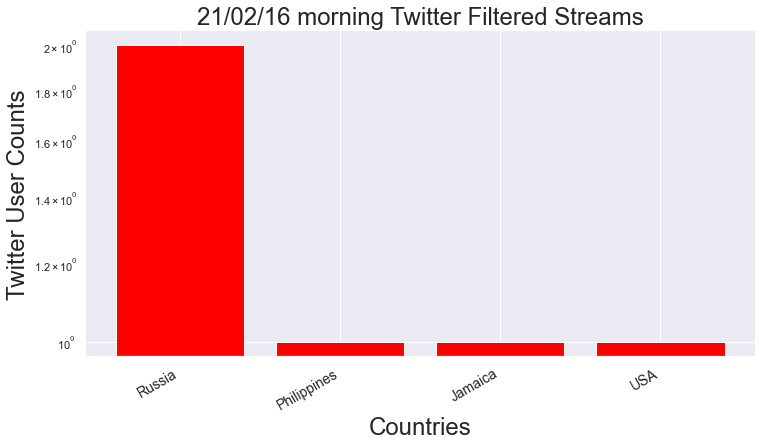

In [15]:
top_count_bar_chart(list(df["country"].value_counts().keys()[:15]), list(df["country"].value_counts().values[:15]), 'red', 
                "21/02/16 morning Twitter Filtered Streams")

In [16]:
dfg = df.groupby(['country'])['language'].count().sort_values(ascending=True).reset_index()
dfg

,country,language
0,Jamaica,1
1,Philippines,1
2,USA,1
3,Russia,2


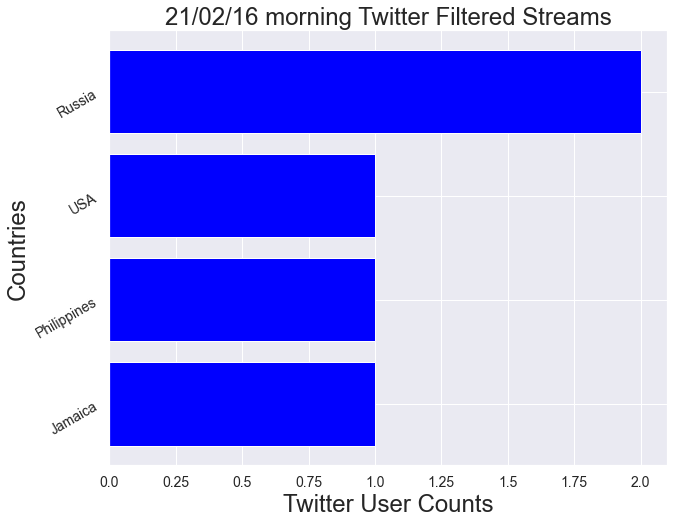

In [17]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,8))
ax.barh(list(dfg.country), list(dfg.language), color='blue')
ax.set_title('21/02/16 morning Twitter Filtered Streams', size=24)
ax.set_xticklabels(ax.get_xticks(), size = 14)
ax.set_xlabel('Twitter User Counts', size=24)
ax.set_ylabel('Countries', size=24)
ax.set_yticklabels(dfg.country, fontsize=14, rotation=30, ha='right')
plt.show()

In [18]:
df.groupby(['country'])['language'].value_counts()

country      language
Jamaica      en          1
Philippines  en          1
Russia       en          1
             ru          1
USA          ko          1
Name: language, dtype: int64

In [19]:
df.groupby(['country'])['language'].value_counts().keys()

MultiIndex([(    'Jamaica', 'en'),
            ('Philippines', 'en'),
            (     'Russia', 'en'),
            (     'Russia', 'ru'),
            (        'USA', 'ko')],
           names=['country', 'language'])

In [20]:
print(df.groupby(['country'])['language'].value_counts().keys()[0])
print(df.groupby(['country'])['language'].value_counts().keys()[0][0])
print(df.groupby(['country'])['language'].value_counts().keys()[0][1])

('Jamaica', 'en')
Jamaica
en


In [21]:
count_lan = defaultdict(list)
for i in df.groupby(['country'])['language'].value_counts().keys():
    count_lan[i[0]].append(i[1])
count_lan

defaultdict(list,
            {'Jamaica': ['en'],
             'Philippines': ['en'],
             'Russia': ['en', 'ru'],
             'USA': ['ko']})

#### for debugging purpose: you can uncomment/comment lines below

In [22]:
#print(count_lan['Argentina'])
#print(count_lan['Belgium'])
#print(count_lan['Brazil'])

In [23]:
print(count_lan.keys())
print(count_lan.values())

dict_keys(['Jamaica', 'Philippines', 'Russia', 'USA'])
dict_values([['en'], ['en'], ['en', 'ru'], ['ko']])


In [24]:
count_lantype = dict()
for i in count_lan:
    count_lantype[i] = np.size(count_lan[i])
count_lantype

{'Jamaica': 1, 'Philippines': 1, 'Russia': 2, 'USA': 1}

#### for debugging purpose: you can uncomment/comment lines below

In [25]:
#count_lantype.pop(0)
#count_lantype.pop(1)
#count_lantype

In [26]:
#sorted_count_lantype = sorted(count_lantype, key=count_lantype.get, reverse=True)
sorted_count_lantype = {k: v for k, v in sorted(count_lantype.items(), key=lambda x:x[1], reverse=False)}
sorted_count_lantype

{'Jamaica': 1, 'Philippines': 1, 'USA': 1, 'Russia': 2}

In [27]:
print(sorted_count_lantype.keys())
print(sorted_count_lantype.values())

dict_keys(['Jamaica', 'Philippines', 'USA', 'Russia'])
dict_values([1, 1, 1, 2])


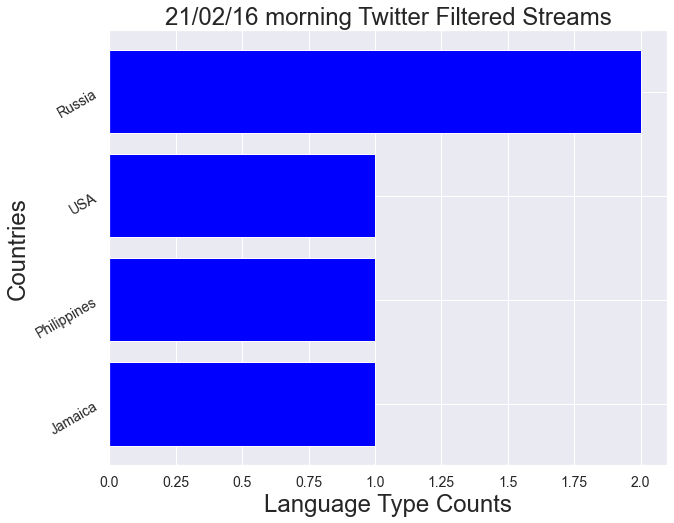

In [28]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,8))
ax.barh(list(sorted_count_lantype.keys()), list(sorted_count_lantype.values()), color='blue')
ax.set_title('21/02/16 morning Twitter Filtered Streams', size=24)
ax.set_xticklabels(ax.get_xticks(), size = 14)
ax.set_xlabel('Language Type Counts', size=24)
ax.set_ylabel('Countries', size=24)
ax.set_yticklabels(list(sorted_count_lantype.keys()), fontsize=14, rotation=30, ha='right')
plt.show()

In [29]:
count_lan

defaultdict(list,
            {'Jamaica': ['en'],
             'Philippines': ['en'],
             'Russia': ['en', 'ru'],
             'USA': ['ko']})

In [30]:
dict_geolang = dict()
dict_geoList = []
dict_lanList = []
for i in count_lan:
    for j in count_lan[i]:
        dict_geolang.setdefault(i, []).append(j)
        dict_geoList.append(i)
        dict_lanList.append(j)
print(dict_geolang)
print(dict_geoList)
print(dict_lanList)

{'Jamaica': ['en'], 'Philippines': ['en'], 'Russia': ['en', 'ru'], 'USA': ['ko']}
['Jamaica', 'Philippines', 'Russia', 'Russia', 'USA']
['en', 'en', 'en', 'ru', 'ko']


In [31]:
data = {'Country': dict_geoList,'Language': dict_lanList}

In [32]:
data2 = {'Country': list(dict_geolang.keys()),'Language': list(dict_geolang.values())}

In [33]:
df2 = pd.DataFrame(data, columns = ['Country','Language']).set_index('Country')
df2

,Language
Country,
Jamaica,en
Philippines,en
Russia,en
Russia,ru
USA,ko


In [34]:
df5 = pd.DataFrame(data2, columns = ['Country','Language'])
df5

,Country,Language
0,Jamaica,[en]
1,Philippines,[en]
2,Russia,"[en, ru]"
3,USA,[ko]


In [35]:
langtypes_list = []
for i in df5['Language']:
    for j in i:
        langtypes_list.append(j)
print(set(langtypes_list))

{'en', 'ko', 'ru'}


In [36]:
df6 = df5.copy()
for i in set(langtypes_list):
    df6[i] = np.zeros(shape=df6.shape[0])
df6.columns

Index(['Country', 'Language', 'en', 'ko', 'ru'], dtype='object')

In [37]:
df6

,Country,Language,en,ko,ru
0,Jamaica,[en],0.0,0.0,0.0
1,Philippines,[en],0.0,0.0,0.0
2,Russia,"[en, ru]",0.0,0.0,0.0
3,USA,[ko],0.0,0.0,0.0


In [38]:
for idx, row in df6.iterrows():
    if row['Language']:
        for i in row['Language']:
            df6.loc[idx, i] = 1
df6

,Country,Language,en,ko,ru
0,Jamaica,[en],1.0,0.0,0.0
1,Philippines,[en],1.0,0.0,0.0
2,Russia,"[en, ru]",1.0,0.0,1.0
3,USA,[ko],0.0,1.0,0.0


In [39]:
df6.drop(['Language'], axis=1, inplace=True)
df6.set_index('Country', inplace=True)
df6

,en,ko,ru
Country,,,
Jamaica,1.0,0.0,0.0
Philippines,1.0,0.0,0.0
Russia,1.0,0.0,1.0
USA,0.0,1.0,0.0


https://indianaiproduction.com/seaborn-heatmap/

https://stackoverflow.com/questions/34706845/change-xticklabels-fontsize-of-seaborn-heatmap

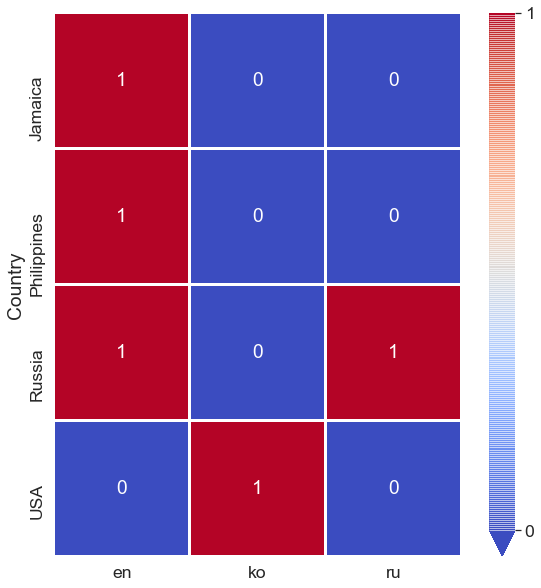

In [40]:
sns.set(font_scale=1.6)
plt.figure(figsize=(10,10))
cbar_kws = {"orientation":"vertical", 
            "shrink":1.,
            'extend':'min', 
            'extendfrac':0.05, 
            "ticks":np.arange(0,2), 
            "drawedges":True,
           }
sns.heatmap(df6, cmap='coolwarm', center=0.5, linewidths=2, square= True, annot=True, cbar_kws=cbar_kws)

In [41]:
df3 = pd.read_csv("./data2/ana2_BTS_geoOnly_210216_morning_CDT.csv",index_col='index')
df3.head()

,date,hour,language,retweets,min,place,country,replies,likes,quotes,sec,time,tweet
index,,,,,,,,,,,,,
1,2021-02-16,6,ko,0,40,"[Santa Clara, CA]",USA,0,0,0,43,2021-02-16T06:40:43.000-06:00,나의그림😙❣️#BTS @BTSfanart #ARMY https://t.co/d6vu...
2,2021-02-16,7,en,0,3,"[Quezon City, National Capital Region]",Philippines,0,0,0,10,2021-02-16T07:03:10.000-06:00,NowON\n#OT7 #BTS https://t.co/YzsSBnIoj1
3,2021-02-16,7,en,0,14,[Jamaica],Jamaica,0,0,0,58,2021-02-16T07:14:58.000-06:00,All now so we gone to collect the leftovers on...
4,2021-02-16,7,ru,1,28,"[Province of Novosibirsk, Russia]",Russia,0,0,0,13,2021-02-16T07:28:13.000-06:00,Боже... Спасите меня кто-нибудь... Пожалуйста....
5,2021-02-16,7,en,0,35,"[Penza, Russia]",Russia,0,0,0,6,2021-02-16T07:35:06.000-06:00,You create a great mood! The best and most ama...


In [42]:
df3p = df3.drop(['date','hour','retweets','min','place','replies','likes','quotes','sec','time','tweet'],axis=1)
df3p.dropna(axis=0, how='any', inplace=True)
df3p

,language,country
index,,
1,ko,USA
2,en,Philippines
3,en,Jamaica
4,ru,Russia
5,en,Russia


In [43]:
langs_list = []
for i in df3p['language']:
    langs_list.append(i)
print(set(langs_list))

{'en', 'ko', 'ru'}


In [44]:
df4 = df3p.copy()
for i in set(langs_list):
    df4[i] = np.zeros(shape=df4.shape[0])
df4.columns

Index(['language', 'country', 'en', 'ko', 'ru'], dtype='object')

In [45]:
for idx, row in df4.iterrows():
    if row['language']:
        df4.loc[idx, row['language']] = 1
df4

,language,country,en,ko,ru
index,,,,,
1,ko,USA,0.0,1.0,0.0
2,en,Philippines,1.0,0.0,0.0
3,en,Jamaica,1.0,0.0,0.0
4,ru,Russia,0.0,0.0,1.0
5,en,Russia,1.0,0.0,0.0


In [46]:
df4.drop(['language'], axis=1, inplace=True)
df4

,country,en,ko,ru
index,,,,
1,USA,0.0,1.0,0.0
2,Philippines,1.0,0.0,0.0
3,Jamaica,1.0,0.0,0.0
4,Russia,0.0,0.0,1.0
5,Russia,1.0,0.0,0.0


In [47]:
df4.set_index('country', inplace=True)
df4

,en,ko,ru
country,,,
USA,0.0,1.0,0.0
Philippines,1.0,0.0,0.0
Jamaica,1.0,0.0,0.0
Russia,0.0,0.0,1.0
Russia,1.0,0.0,0.0


In [48]:
#dfgp = df.groupby(['country'])
#for name, group in dfgp:
#    print(name, ' ', group['language'])
#    print('--------------------------------')

In [49]:
#loc_lan = defaultdict(list)
#for name, group in dfgp:
#    for i in group['language']:
#        loc_lan[name].append(group['language'])
#loc_lan